# TASKS 📒
[Link slides ultima aula](https://moodle.fundoamanha.com/pluginfile.php/684/mod_resource/content/1/Aula%20III.pptx.pdf)

[Link apresentação](https://docs.google.com/presentation/d/1zyHu0vrr0h-wBq8DgQfrgMuBiWZ1hR_g/edit?usp=sharing&ouid=115097960171013324541&rtpof=true&sd=true)
## Pré-processamento

### Coleta de dados

- [x]  Explicar escolha da fatia de tempo

### Limpeza de dados

- [ ]  Remover duplicatas
- [x]  Transformar tipos de dados
- [ ]  ○ variáveis fictícias (dummy)


## Análise Exploratória de Dados

### Estatísticas Descritivas
- [X]  Tendência central
- [X]  Medidas de dispersão

### Exame gráfico dos dados

- [x]  Univariado (distribuição, descritivos)
- [x]  Bivariado
- [x]  Multivariado

### Outras análises

- [x]  Dados ausentes
- [ ]  Outliers
- [ ]  Suposições para técnicas analíticas

# Pré-processamento

Para a coleta de dados, foi utilizado a fonte fornecida pela empresa EVCOMX, de hidrotelemetria. Foi escolhido o periodo de tempo de maio a agosto (3 meses), pois engobla o evento das enchentes que aconteceram no Rio Grande do Sul.

Site fonte: https://www.snirh.gov.br/hidrotelemetria/serieHistorica.aspx

Os dados consistem em informações hídricas das bacias das cidades gaúchas de Muçum, Santa Tereza e Encantado.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('MUÇUM maio-ago.csv', encoding='latin-1', delimiter=';', thousands=',')
df = df.drop('Unnamed: 5', axis='columns')

**Juntando as colunas de data e hora, convertendo para datetime**

In [ ]:
df['data_hora'] = df['Data'] + df['Hora']
df['data_hora'] = pd.to_datetime(df['data_hora'], format = '%d/%m/%Y%H:%M:%S')

# Remove colunas desnecessárias
df = df.drop('Data', axis='columns')
df = df.drop('Hora', axis='columns')

In [ ]:
# Ajusta ordem das colunas para data ficar por primeiro
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df

,data_hora,Chuva (mm),Nível (cm),Vazão (m3/s)
0,2024-05-01 00:00:00,0,1482,6147.50
1,2024-05-01 00:15:00,0,1476,6111.10
2,2024-05-01 00:30:00,0,1471,6080.70
3,2024-05-01 00:45:00,0,1464,6038.30
4,2024-05-01 01:00:00,0,1459,6008.10
...,...,...,...,...
8816,2024-07-31 23:00:00,0,213,230.47
8817,2024-07-31 23:15:00,0,215,235.10
8818,2024-07-31 23:30:00,0,217,239.77
8819,2024-07-31 23:45:00,0,218,242.12


**Transformando numeros em inteiros**

In [ ]:
# Transforma tipo das colunas (timeseries) para inteiros
df['Nível (cm)'] = pd.to_numeric(df['Nível (cm)'], errors='coerce')
df['Chuva (mm)'] = pd.to_numeric(df['Chuva (mm)'], errors='coerce')
# df['Vazão (m3/s)'] = pd.to_numeric(df['Vazão (m3/s)'], errors='coerce')

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8821 entries, 0 to 8820
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   data_hora     8821 non-null   datetime64[ns]
 1   Chuva (mm)    8817 non-null   float64       
 2   Nível (cm)    8821 non-null   int64         
 3   Vazão (m3/s)  8821 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 275.8 KB


,data_hora,Chuva (mm),Nível (cm),Vazão (m3/s)
0,2024-05-01 00:00:00,0.0,1482,6147.50
1,2024-05-01 00:15:00,0.0,1476,6111.10
2,2024-05-01 00:30:00,0.0,1471,6080.70
3,2024-05-01 00:45:00,0.0,1464,6038.30
4,2024-05-01 01:00:00,0.0,1459,6008.10
...,...,...,...,...
8816,2024-07-31 23:00:00,0.0,213,230.47
8817,2024-07-31 23:15:00,0.0,215,235.10
8818,2024-07-31 23:30:00,0.0,217,239.77
8819,2024-07-31 23:45:00,0.0,218,242.12


**Renomeando colunas**

In [ ]:
colunas_alternativas = ['Data_Hora', 'Chuva', 'Nivel', 'Vazao']
df.columns = colunas_alternativas
df

,Data_Hora,Chuva,Nivel,Vazao
0,2024-05-01 00:00:00,0.0,1482,6147.50
1,2024-05-01 00:15:00,0.0,1476,6111.10
2,2024-05-01 00:30:00,0.0,1471,6080.70
3,2024-05-01 00:45:00,0.0,1464,6038.30
4,2024-05-01 01:00:00,0.0,1459,6008.10
...,...,...,...,...
8816,2024-07-31 23:00:00,0.0,213,230.47
8817,2024-07-31 23:15:00,0.0,215,235.10
8818,2024-07-31 23:30:00,0.0,217,239.77
8819,2024-07-31 23:45:00,0.0,218,242.12


# Análise Exploratória de Dados

## Estatísticas Descritivas

### Medidas de Tendência Central:

In [ ]:
# Média:
media_chuva = df['Chuva'].mean()
media_nivel = df['Nivel'].mean()
media_vazao = df['Vazao'].mean()

print(f'A média da chuva em Muçum nos meses de maio até agosto foi de {media_chuva:.2f} mm, a média do nível do rio foi de {media_nivel:.2f} cm e a média da vazão do rio foi de {media_vazao:.2f} m3/2')

A média da chuva em Muçum nos meses de maio até agosto foi de 0.13 mm, a média do nível do rio foi de 582.91 cm e a média da vazão do rio foi de 1743.51 m3/2


In [ ]:
# Mediana
mediana_chuva = df['Chuva'].median()
mediana_nivel = df['Nivel'].median()
mediana_vazao = df['Vazao'].median()

print(f'A mediana da chuva em Muçum nos meses de maio até agosto foi de {mediana_chuva:.2f} mm, a mediana do nível do rio foi de {mediana_nivel:.2f} cm e a mediana da vazão do rio foi de {mediana_vazao:.2f} m3/2')

A mediana da chuva em Muçum nos meses de maio até agosto foi de 0.00 mm, a mediana do nível do rio foi de 450.00 cm e a mediana da vazão do rio foi de 993.17 m3/2


### Medidas de Dispersão:

In [ ]:
# Variância:
variancia_chuva = df['Chuva'].var()
variancia_nivel = df['Nivel'].var()
variancia_vazao = df['Vazao'].var()

print(f'A variância da chuva em Muçum nos meses de maio até agosto foi de {variancia_chuva:.2f} mm, a variância do nível do rio foi de {variancia_nivel:.2f} cm e a variância da vazão do rio foi de {variancia_vazao:.2f} m3/2')

A variância da chuva em Muçum nos meses de maio até agosto foi de 0.52 mm, a variância do nível do rio foi de 190909.69 cm e a variância da vazão do rio foi de 4989206.08 m3/2


In [ ]:
# Desvio Padrão:
desvio_chuva = df['Chuva'].std()
desvio_nivel = df['Nivel'].std()
desvio_vazao = df['Vazao'].std()

print(f'O desvio padrão da chuva em Muçum nos meses de maio até agosto foi de {desvio_chuva:.2f} mm, o desvio padrão do nível do rio foi de {desvio_nivel:.2f} cm e o desvio padrão da vazão do rio foi de {desvio_vazao:.2f} m3/2')

O desvio padrão da chuva em Muçum nos meses de maio até agosto foi de 0.72 mm, o desvio padrão do nível do rio foi de 436.93 cm e o desvio padrão da vazão do rio foi de 2233.65 m3/2


*texto em itálico*## Exame Gráfico dos Dados

### Univariado

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

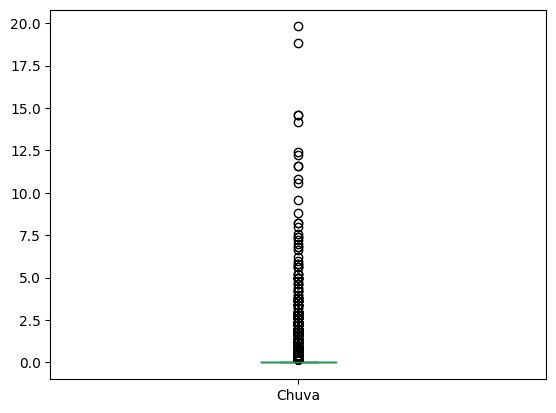

In [ ]:
df['Chuva'].plot(kind='box')
plt.show()

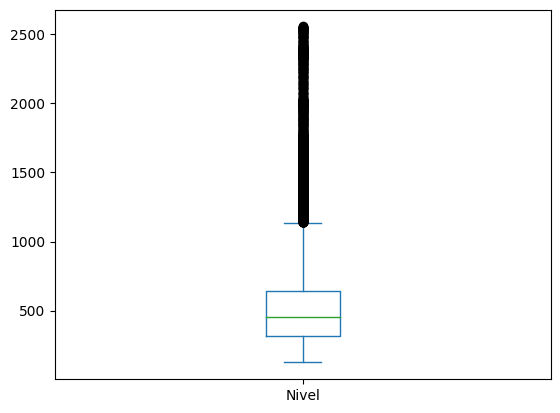

In [ ]:
df['Nivel'].plot(kind='box')
plt.show()

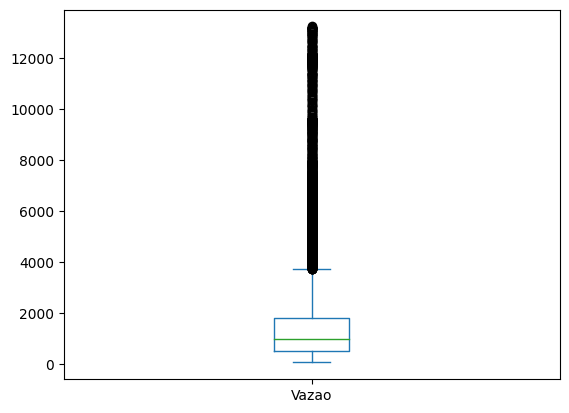

In [ ]:
df['Vazao'].plot(kind='box')
plt.show()

### Bivariado

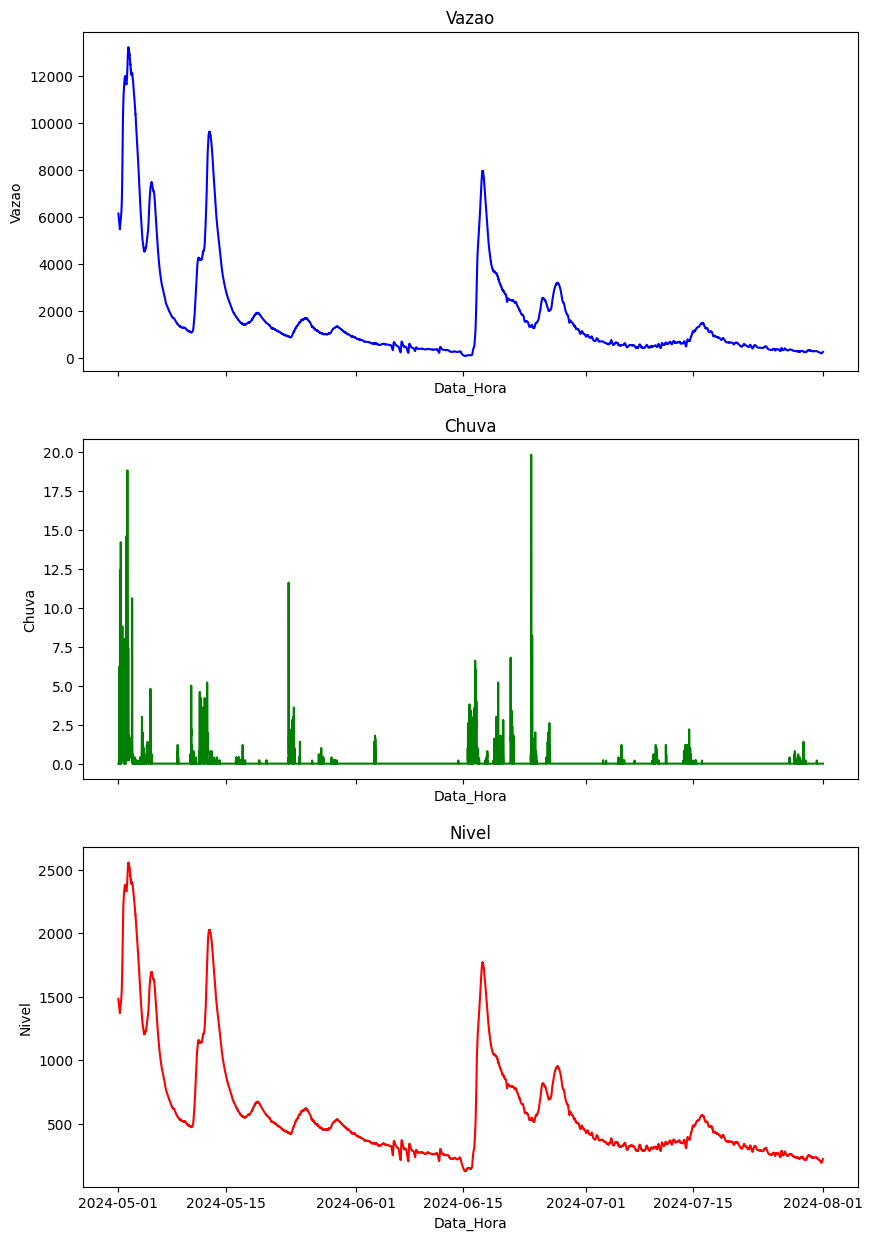

In [ ]:
# Create the subplots in a single row
fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Plot each timeseries
axs[0].plot(df['Data_Hora'], df['Vazao'], color='blue')
axs[0].set_title('Vazao')
axs[0].set_xlabel('Data_Hora')
axs[0].set_ylabel('Vazao')

axs[1].plot(df['Data_Hora'], df['Chuva'], color='green')
axs[1].set_title('Chuva')
axs[1].set_xlabel('Data_Hora')
axs[1].set_ylabel('Chuva')

axs[2].plot(df['Data_Hora'], df['Nivel'], color='red')
axs[2].set_title('Nivel')
axs[2].set_xlabel('Data_Hora')
axs[2].set_ylabel('Nivel')

# Adjust layout and show plot

plt.show()

### Multivariado

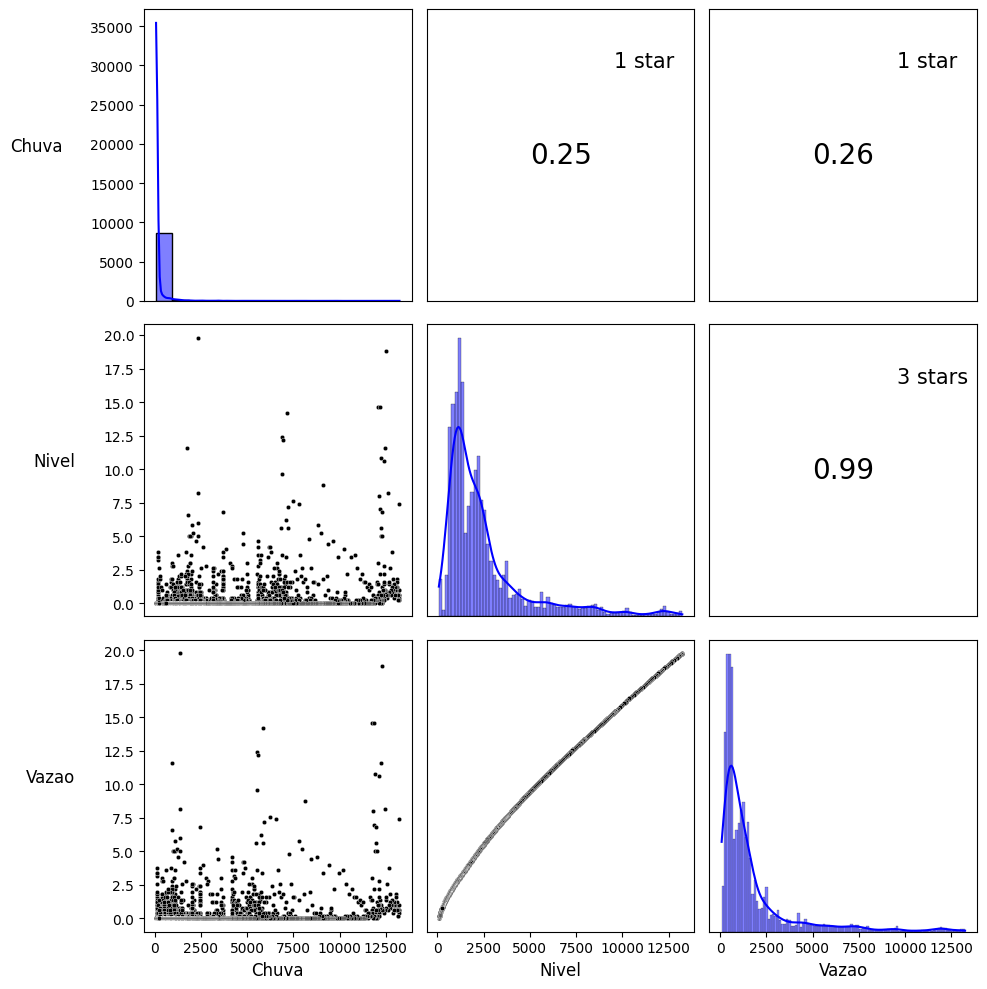

In [ ]:
import seaborn as sns

df2=df.drop('Data_Hora', axis='columns')

fig, axes = plt.subplots(len(df2.columns), len(df2.columns), figsize=(10, 10))

for i, col1 in enumerate(df2.columns):
    for j, col2 in enumerate(df2.columns):
        ax = axes[i, j]
        if i == j:
            #remove legenda duplicada, gera histogramas
            sns.histplot(df2[col1], kde=True, ax=ax, color = "blue")
            ax.set_xlabel('')
            ax.set_ylabel('')
        elif i < j:
            #mostra correlação em número
            corr = df2[col1].corr(df2[col2])
            ax.text(0.5, 0.5, f"{corr:.2f}", ha='center', va='center', fontsize=20, color="black")
            if corr > 0.8:
                ax.text(0.7,0.8, "3 stars", fontsize=15)
            elif corr > 0.5:
                ax.text(0.7,0.8, "2 star", fontsize=15)
            elif corr > 0.2:
                ax.text(0.7,0.8, "1 star", fontsize=15)
        else:
            #mostra correlação em scatterplot
            sns.scatterplot(x=df2[col1], y=df2[col2], ax=ax, s=10, color = "black")
            ax.set_xlabel('')
            ax.set_ylabel('')

        if i < len(df2.columns) - 1:
            ax.set_xticks([])
        if j > 0:
            ax.set_yticks([])

        if j == 0:
            ax.set_ylabel(col1, fontsize=12, rotation=0, labelpad=20, ha='right')
        if i == len(df2.columns) - 1:
            ax.set_xlabel(col2, fontsize=12, ha='center')

plt.tight_layout()
plt.show()


## Outras análises

In [ ]:
# Quantidade de dados nulos no Data Frame
print('Quantidade de dados nulos: ', df.isna().sum())

Quantidade de dados nulos:  Data_Hora    0
Chuva        4
Nivel        0
Vazao        0
dtype: int64
